In [7]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [8]:
class Automatic_SampleSelection:
    def __init__(self, image_path, output_folder, SelectSize=0.1):
        self.image = cv2.imread(image_path)
        self.output_folder = output_folder
        self.roi_indices = []
        self.SelectSize=SelectSize
        
    def Auto_Selection(self):
        # Extract the red channel of the image
        red_channel = self.image[:, :, 2]
    
        # Apply thresholding to the grayscale image to create a binary image
        _, thresh = cv2.threshold(red_channel, 127, 255, cv2.THRESH_BINARY)
    
        # Find contours in the binary image
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
        # Sort contours from top to bottom, left to right
        contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1] * self.image.shape[1] + cv2.boundingRect(c)[0])
        centerX=[]
        centerY=[]
        height=[]
        width=[]
    
        # Iterate through each contour and find the bounding box
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
    
            # Check if the rectangle is at least 50x50 pixels
            if w >= 50 and h >= 50 and abs(w - h) <= 15:
                # Select the ROI and save it as a separate image
                cen_x=int((x+(x+w))/2)
                cen_y=int((y+(y+h))/2)
                hei=int(self.SelectSize*h)
                wid=int(self.SelectSize*w)
                Sample=self.image[y:y+h, x:x+w]
                roi=self.image[cen_y-hei:cen_y +hei, cen_x-wid:cen_x +wid]
                centerX.append(cen_x)
                centerY.append(cen_y)
                height.append(hei)
                width.append(wid)
    
                # Generate the filename for the ROI image
                filename = 'ROI{}.jpg'.format(len(self.roi_indices))
    
                # Specify the output path for the ROI image
                output_path = os.path.join(self.output_folder, filename)
    
                # Save the ROI image
                cv2.imwrite(output_path, roi)
    
                # Show the sample as a separate plot with a label indicating the sample number
                plt.imshow(cv2.cvtColor(Sample, cv2.COLOR_BGR2RGB))
                plt.title('sample {}'.format(len(self.roi_indices)))
                plt.show()
    
                # Show the ROI as a separate plot with a label indicating the ROI number
                plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
                plt.title('ROI {}'.format(len(self.roi_indices)))
                plt.show()
    
                # Draw the bounding box on the original image with ROI number
                cv2.rectangle(self.image, (x, y), (x + w, y + h), (0, 255,0), 2)
                cv2.rectangle(self.image, (cen_x-wid, cen_y-hei), 
                              (cen_x + wid, cen_y + hei), (0,0,255), 2)
                # Add text with ROI number
                cv2.putText(self.image, str(len(self.roi_indices)), (x, y - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
                # Increment roi_indices by 1
                self.roi_indices.append(1)
    
        # Show the resulting image using matplotlib
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.show()
        image_coor=pd.DataFrame({'centerX':centerX,'centerY':centerY,
                                 'height':height,'width':width})

        print(image_coor)

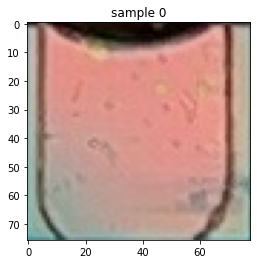

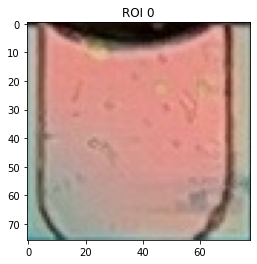

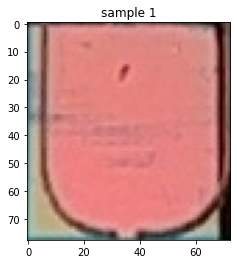

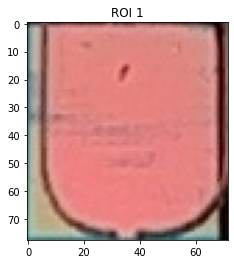

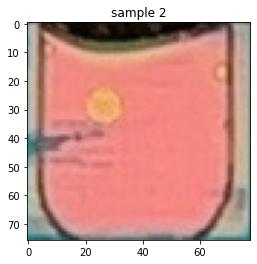

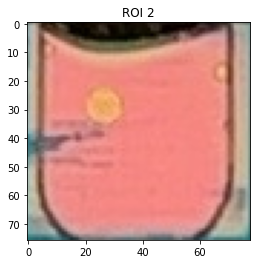

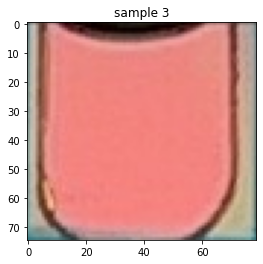

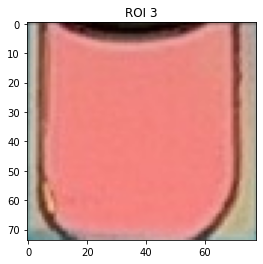

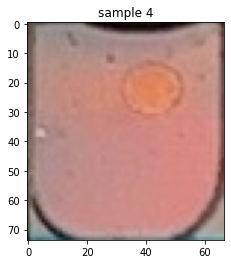

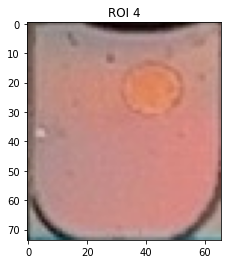

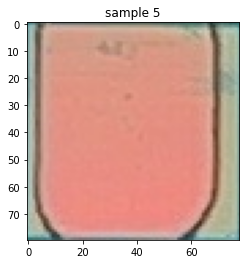

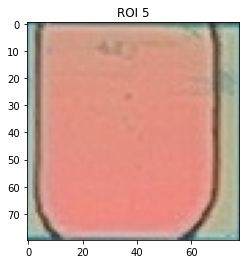

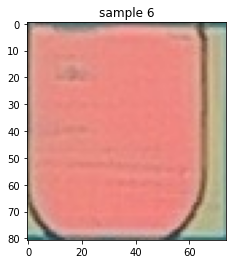

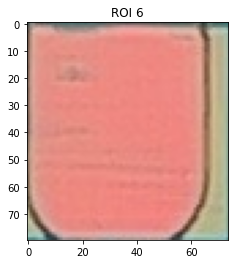

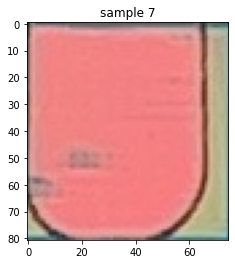

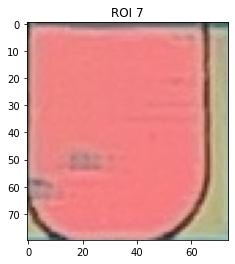

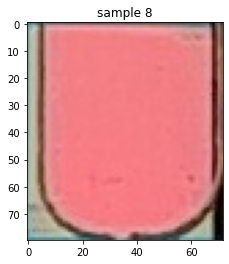

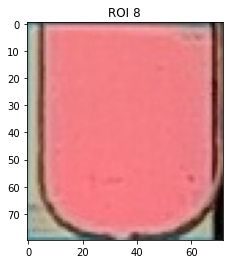

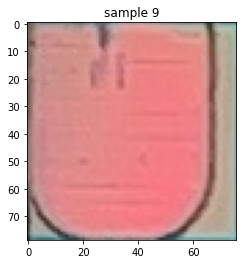

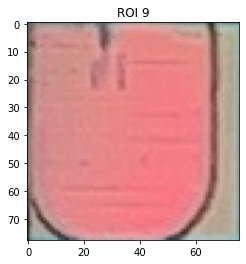

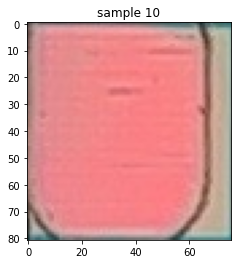

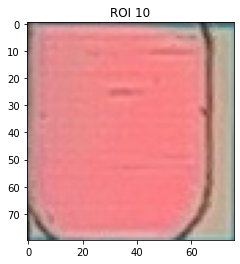

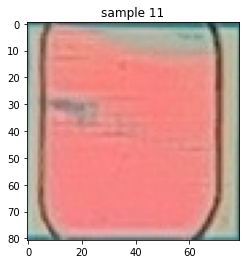

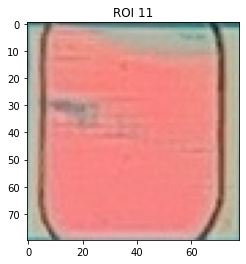

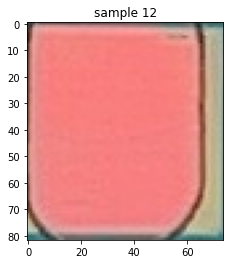

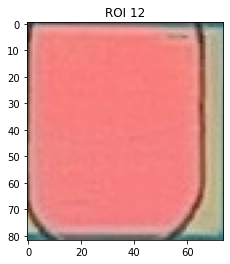

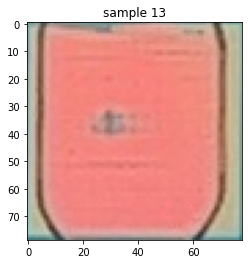

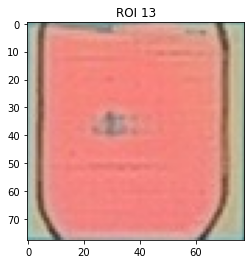

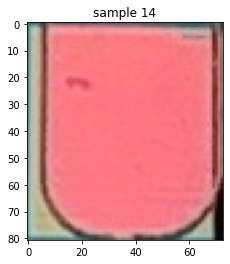

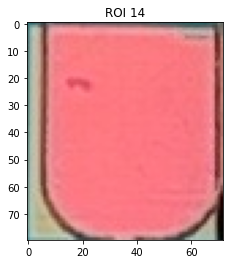

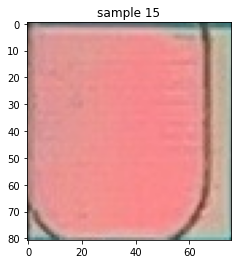

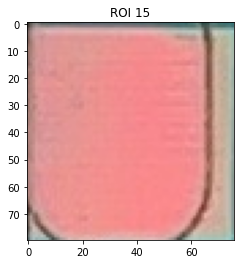

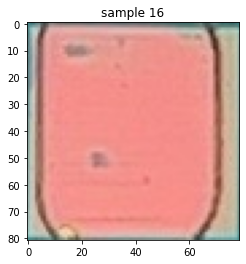

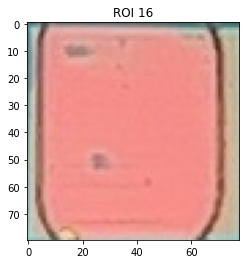

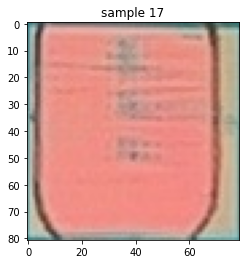

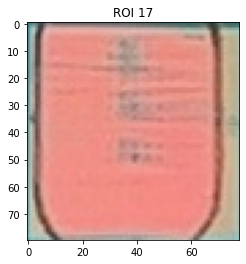

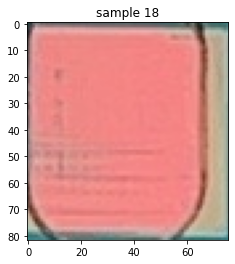

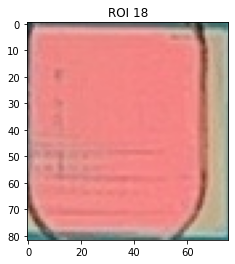

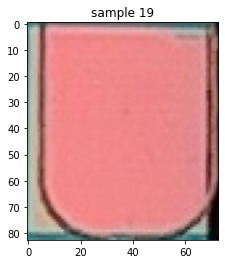

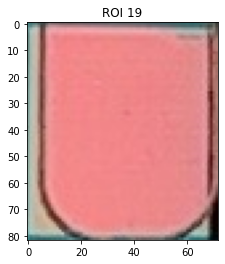

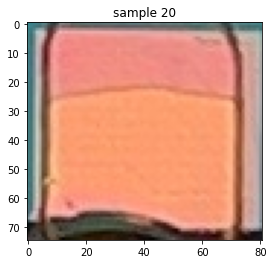

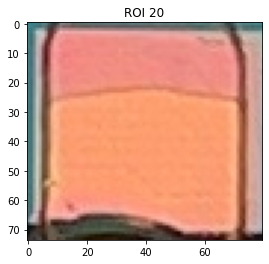

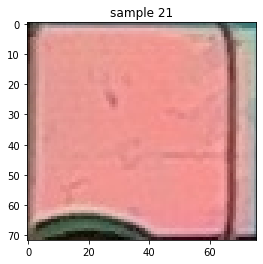

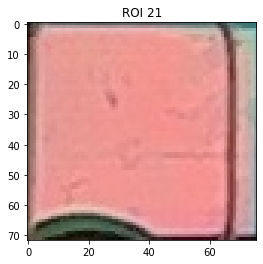

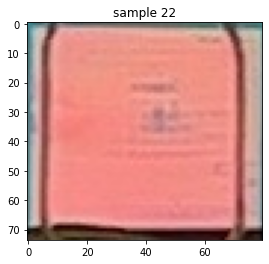

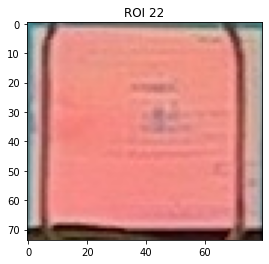

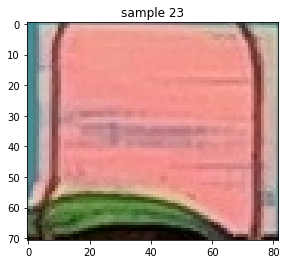

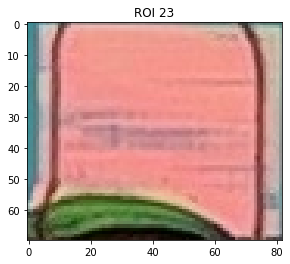

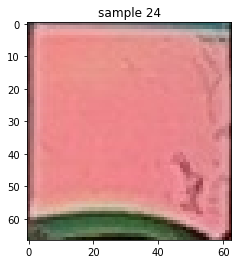

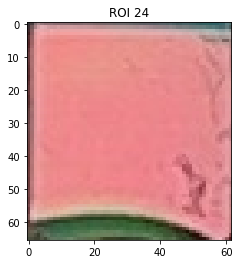

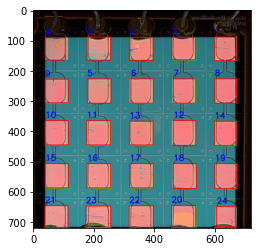

    centerX  centerY  height  width
0       217      127      38     39
1       635      128      39     36
2       357      128      38     39
3       497      127      37     39
4        73      128      37     33
5       218      267      40     39
6       360      267      40     37
7       500      267      40     37
8       636      267      40     36
9        78      267      39     38
10       78      405      40     38
11      216      405      40     39
12      500      406      41     37
13      357      406      39     39
14      635      407      40     36
15       78      547      40     38
16      217      547      40     39
17      358      547      40     39
18      501      548      41     38
19      636      548      41     36
20      497      682      37     40
21       77      682      36     38
22      357      683      37     40
23      215      682      35     41
24      637      682      33     31


In [9]:
# Initialize ROIAnalyzer object
image_path = 'C:/Users/james/Desktop/Surface plasma/Oil_water_1/water001.JPG'
output_folder = 'C:/Users/james/Desktop/Surface plasma/Oil_water_1/ROIs_1'
analyzer = Automatic_SampleSelection(image_path, output_folder,SelectSize=0.5)

# Process the image and analyze ROIs
analyzer.Auto_Selection()